In [1]:
%load_ext autoreload
%autoreload 2

import cc.count.countcells as cc 

In [2]:
imdir = 'data/x4/raw/AC_counted'

log_params = {
    'min_s': 1,
    'max_s': 30,
    'num_s': 20,
    'thresh':0.2,
    'overlap': 0.001,
    'log_scale': False,
    'exclude_border': False
}

x4_xounts = cc.collect_cell_counts(
    imdir, 
    log_params = log_params, 
    verbose = False, 
    testi = 0)


Current index: 0
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
Current index: 10
Current index: 20
Current index: 30
Current index: 40
Current index: 50
Current index: 60
Current index: 70
Current index: 80


In [3]:
import cc.compare.compare as comp

x4a = comp.extract_panda(x4_xounts)
x4a

,id,name,num_cells,slice_area,cells_per_um2,cells_per_mm2,percent_slice
0,AC001,AC001_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,29,116508.444444,0.000249,248.908997,100.000000
1,AC002,AC002_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,25,116492.444444,0.000215,214.606193,99.986267
2,AC003,AC003_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,24,116488.888889,0.000206,206.028233,99.983215
3,AC004,AC004_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,31,116456.888889,0.000266,266.192926,99.955750
4,AC005,AC005_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,19,116206.666667,0.000164,163.501807,99.740982
...,...,...,...,...,...,...,...
85,AC086,AC086_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,7,116404.000000,0.000060,60.135391,99.910355
86,AC087,AC087_MAX_1616E_GFAP.1.1000_Iba1.1.1000_10.21....,5,116497.777778,0.000043,42.919274,99.990845
87,AC088,AC088_1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_2...,5,116508.000000,0.000043,42.915508,99.999619
88,AC089,AC089_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,3,115940.444444,0.000026,25.875354,99.512482


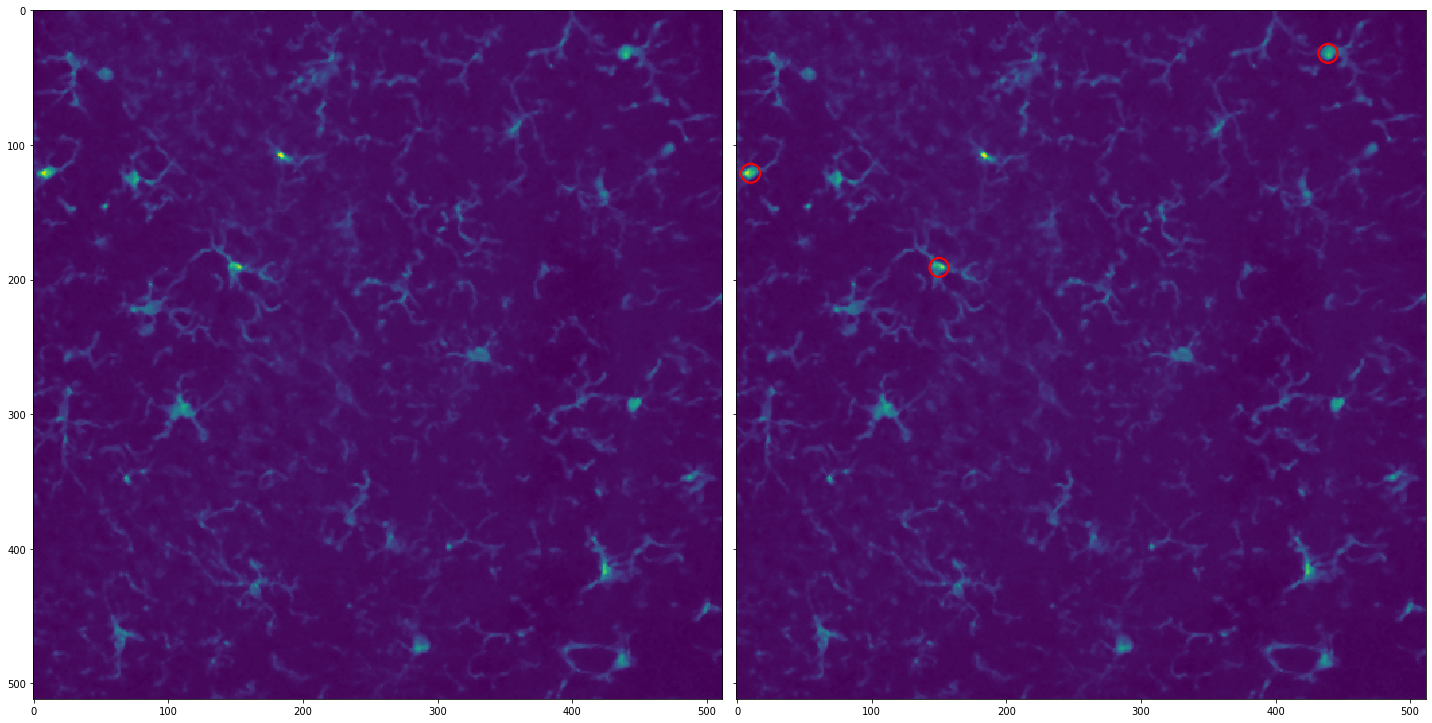

In [5]:
x4_xounts[89].overlay()

In [6]:
import pickle
PIK = 'data/x4/processed/x4_counts_v_AC_001.pkl'
with open(PIK, 'wb') as f:
    pickle.dump(x4_xounts, f)

In [7]:
import pandas as pd 

ac_file = 'data/x4/raw/AC_counted/AC_counts_cmh.csv'

x4m = pd.read_csv(ac_file)

x4m

,id,gt,location,count,area_um2,cells_per_mm2
0,AC001,ko,DG,27.0,116508.4444,231.742859
1,AC002,ko,DG,27.0,116508.4444,231.742859
2,AC003,ko,DG,29.0,116508.4444,248.908997
3,AC004,ko,DG,34.0,116508.4444,291.824341
4,AC005,ko,DG,20.0,116508.4444,171.661377
...,...,...,...,...,...,...
86,AC087,wt,CA3,16.0,116508.4444,137.329102
87,AC088,wt,CA3,14.0,116508.4444,120.162964
88,AC089,wt,CA3,19.0,116508.4444,163.078308
89,AC090,wt,CA3,21.0,116508.4444,180.244446


In [10]:
x4b = pd.merge(x4a, x4m, on='id' )
x4b

,id,name,num_cells,slice_area,cells_per_um2,cells_per_mm2_x,percent_slice,gt,location,count,area_um2,cells_per_mm2_y
0,AC001,AC001_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,29,116508.444444,0.000249,248.908997,100.000000,ko,DG,27.0,116508.4444,231.742859
1,AC002,AC002_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,25,116492.444444,0.000215,214.606193,99.986267,ko,DG,27.0,116508.4444,231.742859
2,AC003,AC003_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,24,116488.888889,0.000206,206.028233,99.983215,ko,DG,29.0,116508.4444,248.908997
3,AC004,AC004_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,31,116456.888889,0.000266,266.192926,99.955750,ko,DG,34.0,116508.4444,291.824341
4,AC005,AC005_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,19,116206.666667,0.000164,163.501807,99.740982,ko,DG,20.0,116508.4444,171.661377
...,...,...,...,...,...,...,...,...,...,...,...,...
85,AC086,AC086_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,7,116404.000000,0.000060,60.135391,99.910355,wt,CA2,22.0,116508.4444,188.827515
86,AC087,AC087_MAX_1616E_GFAP.1.1000_Iba1.1.1000_10.21....,5,116497.777778,0.000043,42.919274,99.990845,wt,CA3,16.0,116508.4444,137.329102
87,AC088,AC088_1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_2...,5,116508.000000,0.000043,42.915508,99.999619,wt,CA3,14.0,116508.4444,120.162964
88,AC089,AC089_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,3,115940.444444,0.000026,25.875354,99.512482,wt,CA3,19.0,116508.4444,163.078308


In [20]:
from scipy.stats import pearsonr

pearsonr(x4b['num_cells'], x4b['count'])

(0.8309052809743271, 3.9975671427053434e-24)

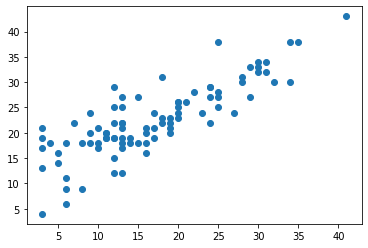

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x4b['num_cells'], x4b['count'])

Text(0, 0.5, 'Count')

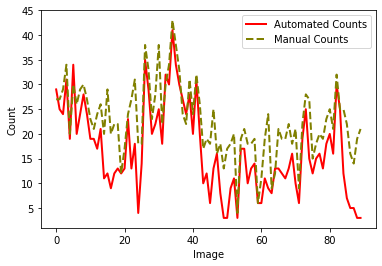

In [23]:
# multiple line plot
#plt.fig( )
plt.plot(range(len(x4b['num_cells'])), x4b['num_cells'], marker='', color='red', linewidth=2, label = 'Automated Counts')
plt.plot(range(len(x4b['count'])), x4b['count'], marker='', color='olive', linewidth=2, linestyle='dashed', label='Manual Counts')
plt.legend()
plt.xlabel('Image')
plt.ylabel('Count')

In [33]:
df_ctx_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]
df_ctx_wt

,id,gt,location,cells_per_mm2_x,cells_per_mm2_y,num_cells,count
51,AC052,wt,Ctx,77.656425,154.495239,9,18.0
52,AC053,wt,Ctx,94.427085,171.661377,11,20.0
53,AC054,wt,Ctx,45.067301,56.250000,3,4.0
54,AC055,wt,Ctx,213.448661,238.560268,17,19.0
55,AC056,wt,Ctx,145.943904,180.244446,17,21.0
56,AC057,wt,Ctx,85.934606,154.495239,10,18.0
57,AC058,wt,Ctx,111.609272,154.495239,13,18.0
58,AC059,wt,Ctx,120.247825,163.078308,14,19.0
59,AC060,wt,Ctx,94.853995,173.076923,6,6.0
60,AC061,wt,Ctx,51.714033,94.413757,6,11.0


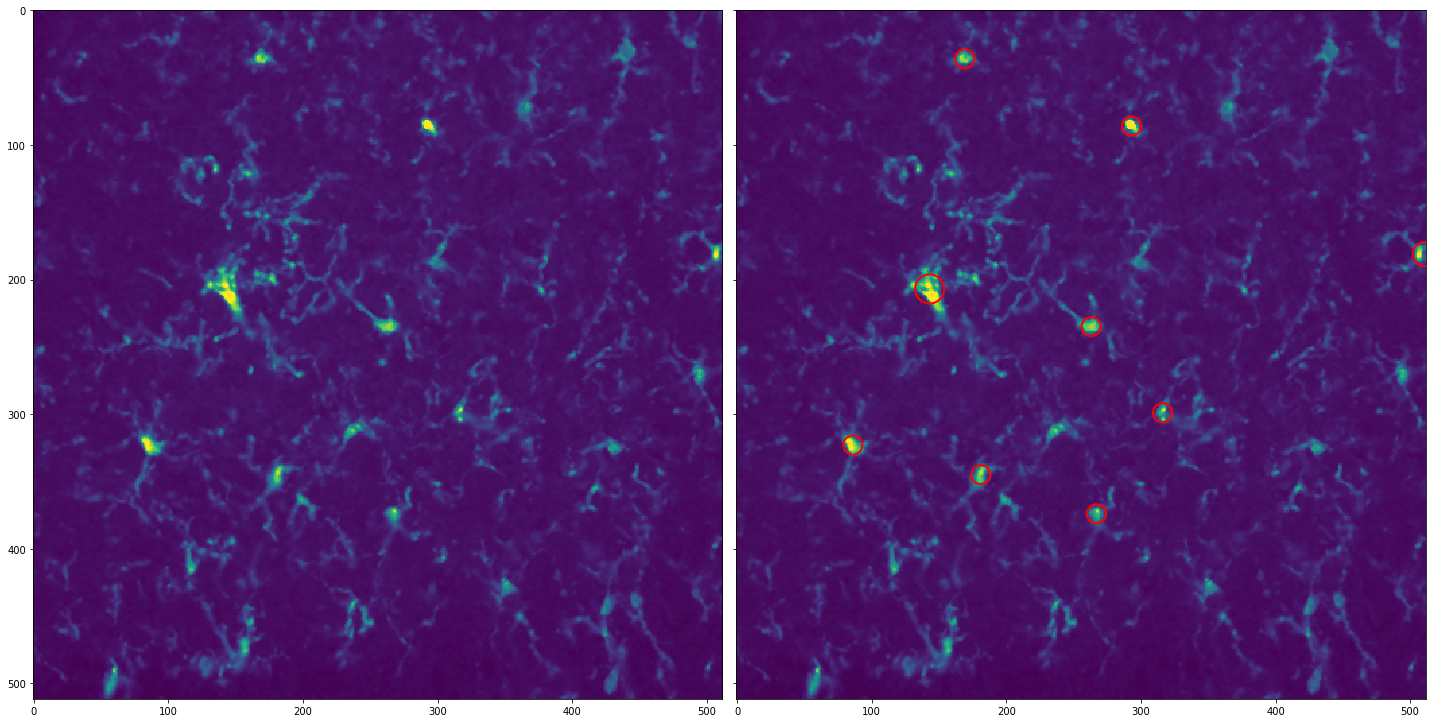

In [34]:
x4_xounts[51].overlay()

In [37]:
# Ctx
df_ctx_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

df_ctx_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

# CA1
df_ca1_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA1'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

df_ca1_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA1'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'c3unt']]

# CA2
df_ca2_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA2'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

df_ca2_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA2'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

# CA3
df_ca3_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA3'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

df_ca3_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA3'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

# DG

df_dg_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'DG'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]

df_dg_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'DG'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'count']]



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
df_dg_ko

,id,gt,location,cells_per_mm2_x,cells_per_mm2_y,num_cells,count
0,AC001,ko,DG,248.908997,231.742859,29,27.0
1,AC002,ko,DG,214.606193,231.742859,25,27.0
2,AC003,ko,DG,206.028233,248.908997,24,29.0
3,AC004,ko,DG,266.192926,291.824341,31,34.0
4,AC005,ko,DG,163.501807,171.661377,19,20.0
5,AC006,ko,DG,291.824341,257.492065,34,30.0
6,AC007,ko,DG,171.682989,223.159790,20,26.0
7,AC008,ko,DG,206.042384,248.908997,24,29.0
8,AC009,ko,DG,240.379112,257.492065,28,30.0
9,AC010,ko,DG,206.309242,231.742859,24,27.0


In [42]:
# Ctx
data_all =[
    df_ctx_wt['cells_per_mm2_x'],
    df_ctx_wt['cells_per_mm2_y'],
    df_ctx_ko['cells_per_mm2_x'],
    df_ctx_ko['cells_per_mm2_y'],
    df_ca1_wt['cells_per_mm2_x'],
    df_ca1_wt['cells_per_mm2_y'],
    df_ca1_ko['cells_per_mm2_x'],
    df_ca1_ko['cells_per_mm2_y'],
    df_ca2_wt['cells_per_mm2_x'],
    df_ca2_wt['cells_per_mm2_y'],
    df_ca2_ko['cells_per_mm2_x'],
    df_ca2_ko['cells_per_mm2_y'],
    df_ca3_wt['cells_per_mm2_x'],
    df_ca3_wt['cells_per_mm2_y'],
    df_ca3_ko['cells_per_mm2_x'],
    df_ca3_ko['cells_per_mm2_y'],
    df_dg_wt['cells_per_mm2_x'],
    df_dg_wt['cells_per_mm2_y'],
    df_dg_ko['cells_per_mm2_x'],
    df_dg_ko['cells_per_mm2_y']
]
data

[51     77.656425
 52     94.427085
 53     45.067301
 54    213.448661
 55    145.943904
 56     85.934606
 57    111.609272
 58    120.247825
 59     94.853995
 60     51.714033
 61     94.612623
 62    154.495239
 63    112.030173
 64    135.315806
 65    113.311046
 66    103.127435
 67     94.558764
 68    111.596498
 69    137.460194
 70     86.351809
 71    102.996826
 Name: cells_per_mm2_x, dtype: float64, 51    154.495239
 52    171.661377
 53     56.250000
 54    238.560268
 55    180.244446
 56    154.495239
 57    154.495239
 58    163.078308
 59    173.076923
 60     94.413757
 61    163.078308
 62    205.993652
 63    154.495239
 64    164.794922
 65    180.244446
 66    163.078308
 67    163.078308
 68    188.827515
 69    154.495239
 70    180.244446
 71    154.495239
 Name: cells_per_mm2_y, dtype: float64, 10    163.078308
 11    163.078308
 12    145.971195
 13    180.322176
 14     94.520485
 15    103.255611
 16     77.254987
 17    103.628136
 18    111.780734
 19 

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

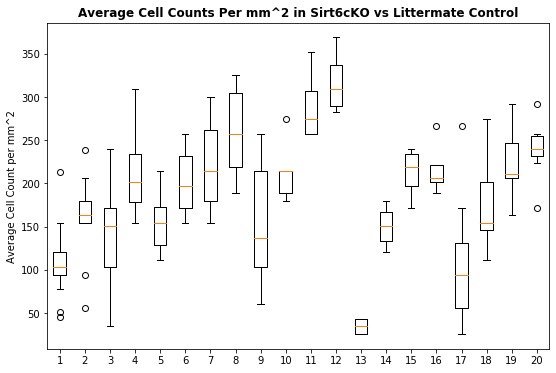

In [44]:
import matplotlib.pyplot as plt


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [45]:
data_wt =[
    df_ctx_wt['cells_per_mm2_x'],
    df_ctx_wt['cells_per_mm2_y'],
    df_ca1_wt['cells_per_mm2_x'],
    df_ca1_wt['cells_per_mm2_y'],
    df_ca2_wt['cells_per_mm2_x'],
    df_ca2_wt['cells_per_mm2_y'],
    df_ca3_wt['cells_per_mm2_x'],
    df_ca3_wt['cells_per_mm2_y'],
    df_dg_wt['cells_per_mm2_x'],
    df_dg_wt['cells_per_mm2_y']
]
data

[51     77.656425
 52     94.427085
 53     45.067301
 54    213.448661
 55    145.943904
 56     85.934606
 57    111.609272
 58    120.247825
 59     94.853995
 60     51.714033
 61     94.612623
 62    154.495239
 63    112.030173
 64    135.315806
 65    113.311046
 66    103.127435
 67     94.558764
 68    111.596498
 69    137.460194
 70     86.351809
 71    102.996826
 Name: cells_per_mm2_x, dtype: float64, 51    154.495239
 52    171.661377
 53     56.250000
 54    238.560268
 55    180.244446
 56    154.495239
 57    154.495239
 58    163.078308
 59    173.076923
 60     94.413757
 61    163.078308
 62    205.993652
 63    154.495239
 64    164.794922
 65    180.244446
 66    163.078308
 67    163.078308
 68    188.827515
 69    154.495239
 70    180.244446
 71    154.495239
 Name: cells_per_mm2_y, dtype: float64, 10    163.078308
 11    163.078308
 12    145.971195
 13    180.322176
 14     94.520485
 15    103.255611
 16     77.254987
 17    103.628136
 18    111.780734
 19 

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

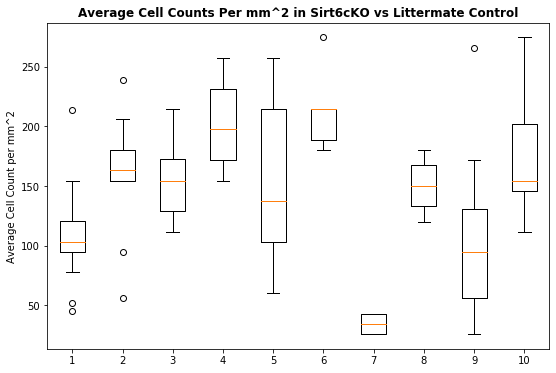

In [46]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_wt)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [48]:
data_ko = [
    df_ctx_ko['cells_per_mm2_x'],
    df_ctx_ko['cells_per_mm2_y'],
    df_ca1_ko['cells_per_mm2_x'],
    df_ca1_ko['cells_per_mm2_y'],
    df_ca2_ko['cells_per_mm2_x'],
    df_ca2_ko['cells_per_mm2_y'],
    df_ca3_ko['cells_per_mm2_x'],
    df_ca3_ko['cells_per_mm2_y'],
    df_dg_ko['cells_per_mm2_x'],
    df_dg_ko['cells_per_mm2_y']
]

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

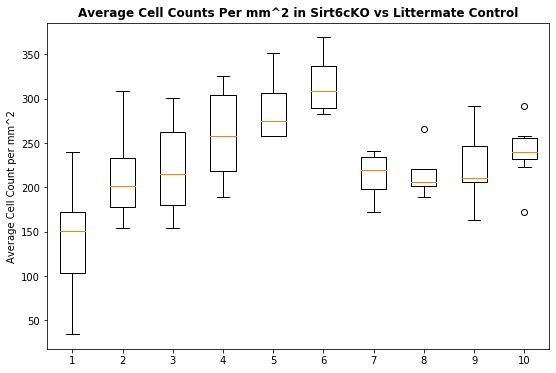

In [49]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_ko)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [66]:
x4wt_a = x4b.loc[(x4b['gt']=='wt'), ['gt', 'location', 'cells_per_mm2_x']]
x4wt_a['location'] = x4wt_a['location'] + '_auto'
x4wt_a.rename(columns = {'cells_per_mm2_x':'Cells'}, inplace = True)
x4wt_a

,gt,location,Cells
41,wt,DG_auto,266.123863
42,wt,DG_auto,171.738682
43,wt,DG_auto,85.883763
44,wt,DG_auto,103.047535
45,wt,DG_auto,51.525341
46,wt,DG_auto,111.585429
47,wt,DG_auto,137.433955
48,wt,DG_auto,68.694686
49,wt,DG_auto,25.765031
50,wt,DG_auto,25.803443


In [65]:
x4wt_m = x4b.loc[(x4b['gt']=='wt'), ['gt', 'location', 'cells_per_mm2_y']]
x4wt_m['location'] = x4wt_m['location'] + '_manual'
x4wt_m.rename(columns = {'cells_per_mm2_y':'Cells'}, inplace = True)
x4wt_m

,gt,location,Cells
41,wt,DG_manual,274.658203
42,wt,DG_manual,223.159790
43,wt,DG_manual,145.912170
44,wt,DG_manual,163.078308
45,wt,DG_manual,154.495239
46,wt,DG_manual,214.576721
47,wt,DG_manual,137.329102
48,wt,DG_manual,154.495239
49,wt,DG_manual,111.579895
50,wt,DG_manual,145.912170


In [67]:
frames =[x4wt_a, x4wt_m]
cat = pd.concat(frames)
cat

,gt,location,Cells
41,wt,DG_auto,266.123863
42,wt,DG_auto,171.738682
43,wt,DG_auto,85.883763
44,wt,DG_auto,103.047535
45,wt,DG_auto,51.525341
...,...,...,...
85,wt,CA2_manual,188.827515
86,wt,CA3_manual,137.329102
87,wt,CA3_manual,120.162964
88,wt,CA3_manual,163.078308


gt   location       Cells
75  wt   CA1_auto  207.954650
78  wt   CA1_auto  111.668073
77  wt   CA1_auto  137.390946
76  wt   CA1_auto  128.781404
74  wt   CA1_auto  128.785826
..  ..        ...         ...
48  wt  DG_manual  154.495239
49  wt  DG_manual  111.579895
50  wt  DG_manual  145.912170
41  wt  DG_manual  274.658203
44  wt  DG_manual  163.078308

[98 rows x 3 columns]


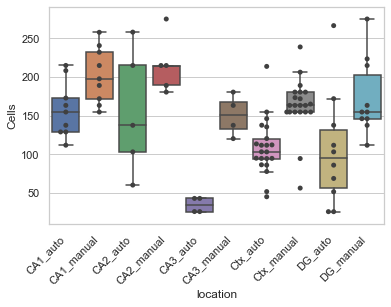

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = cat.sort_values(by=['location'])
print (grouped)
sns.set(style="whitegrid")


ax = sns.boxplot(x="location", y="Cells", data=grouped, showfliers = False)
ax = sns.swarmplot(x="location", y="Cells", data=grouped, color=".25")
ax.set_xticklabels(ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
    #fontsize='x-large')
plt.show()